In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [3]:
df=pd.read_csv('dataframe.csv')

In [5]:
print(df.head())

   Year Species  Beak length  Beak depth  Beak width  CI Beak length  \
0  1973  fortis        10.76        9.48        8.69           0.097   
1  1974  fortis        10.72        9.42        8.66           0.144   
2  1975  fortis        10.57        9.19        8.55           0.075   
3  1976  fortis        10.64        9.23        8.58           0.048   
4  1977  fortis        10.73        9.35        8.63           0.085   

   CI Beak depth  CI Beak width  
0          0.130          0.081  
1          0.170          0.112  
2          0.084          0.057  
3          0.053          0.039  
4          0.092          0.066  


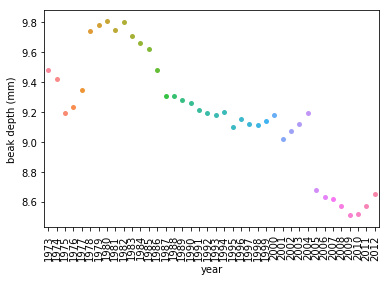

In [4]:
sns.swarmplot('Year','Beak depth',data=df)
plt.xlabel('year')
plt.ylabel('beak depth (mm)')
plt.xticks(rotation=90)
plt.show()

In [5]:
def ecdf(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x,y

In [6]:
bd_1975=pd.read_csv('bd_1975.csv',usecols=[3]).values[:248]
bd_1975=np.ravel(bd_1975)
bd_2012=pd.read_csv('bd_2012.csv',usecols=[3]).values
bd_2012=np.ravel(bd_2012)
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

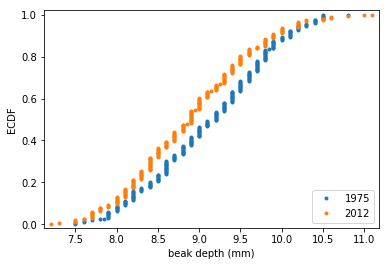

In [7]:
plt.plot(x_1975, y_1975, marker='.', linestyle='none')
plt.plot(x_2012, y_2012, marker='.', linestyle='none')

plt.margins(0.02)
plt.xlabel('beak depth (mm)')
plt.ylabel('ECDF')
plt.legend(('1975', '2012'), loc='lower right')
plt.show()


In [8]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012)-np.mean(bd_1975)

In [9]:
#boostrap function
def draw_bs_reps(data,func,size):
    bs_replicates=np.empty(size)
    for i in range(size):
        bs_sample = np.random.choice(data, len(data))
        bs_replicates[i]=func(bs_sample)
    return bs_replicates

In [10]:
# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975,np.mean,10000)
bs_replicates_2012 = draw_bs_reps(bd_2012,np.mean,10000)

In [11]:
print(len(bs_replicates_1975))

10000


In [12]:
print(len(bs_replicates_2012))

10000


In [13]:
bs_diff_replicates = bs_replicates_2012-bs_replicates_1975

In [14]:
bs_diff_replicates

array([-0.21774194, -0.30705645, -0.31895161, ..., -0.26592742,
       -0.21330645, -0.32399194])

In [15]:
conf_int = np.percentile(bs_diff_replicates,[2.5,97.5])

In [16]:
conf_int

array([-0.34718246, -0.08507056])

In [17]:
# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = -0.21693548387096762 mm
95% confidence interval = [-0.34718246 -0.08507056] mm


In [18]:
#Hypothesis test: Are beaks deeper in 2012?
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

In [20]:
combined_mean

9.011290322580646

In [19]:
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

In [21]:
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted,np.mean,10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted,np.mean,10000)

In [22]:
bs_replicates_1975

array([9.00423387, 9.04395161, 9.01673387, ..., 9.17600806, 8.99133065,
       9.        ])

In [23]:
bs_replicates_2012

array([8.97520161, 9.04858871, 8.97479839, ..., 8.99254032, 9.00625   ,
       9.08568548])

In [24]:
bs_diff_replicates = bs_replicates_2012- bs_replicates_1975

In [25]:
p = np.sum( -bs_diff_replicates>=(-mean_diff) ) / len(bs_diff_replicates)
print('p =', p)

p = 0.0002


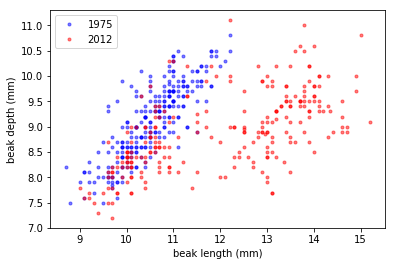

In [28]:
# Make scatter plot of 1975 data
bl_1975=pd.read_csv('1975.csv',usecols=[2],engine='python').values[:248]
bl_1975=np.ravel(bl_1975)
plt.plot(bl_1975, bd_1975, marker='.',linestyle='none', color='blue', alpha=0.5)
# Make scatter plot of 2012 data
bl_2012=pd.read_csv('2012.csv',usecols=[2],engine='python').values[:248]
bl_2012=np.ravel(bl_2012)
plt.plot(bl_2012, bd_2012, marker='.',linestyle='none', color='red', alpha=0.5)

plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')
plt.show()

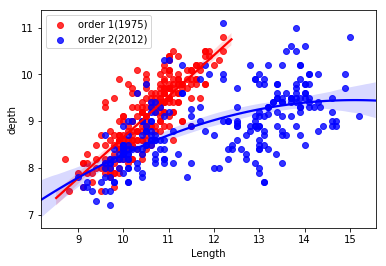

In [30]:
#LINEAR REGRESSION
df=pd.DataFrame({'bd_1975':bd_1975,'bd_2012':bd_2012,'bl_1975':bl_1975,'bl_2012':bl_2012})
sns.regplot(x='bl_1975',y='bd_1975',data=df,color='red',order=1,label='order 1(1975)')
sns.regplot(x='bl_2012',y='bd_2012',data=df,color='blue',order=2,label='order 2(2012)')
plt.xlabel('Length')
plt.ylabel('depth')
plt.legend()
plt.show()

In [51]:
dataframe=pd.read_csv('2012.csv',engine='python',usecols=[1,2,3])

In [43]:
dataframe.head()

,species,blength,bdepth
0,fortis,10.0,8.5
1,fortis,12.5,8.9
2,fortis,9.3,7.5
3,fortis,10.3,9.6
4,fortis,11.0,9.2


In [44]:
dataframe.species.value_counts()

scandens    127
fortis      121
Name: species, dtype: int64

# Clustering

In [45]:
from sklearn.cluster import KMeans

In [53]:
dataframe_bl=dataframe.loc[:,['blength','bdepth']]
species=dataframe.loc[:,'species']
print(dataframe.head())

  species  blength bdepth
0  fortis     10.0    8.5
1  fortis     12.5    8.9
2  fortis      9.3    7.5
3  fortis     10.3    9.6
4  fortis     11.0    9.2


In [54]:
dataframe_bl['bdepth']=pd.to_numeric(dataframe_bl['bdepth'],errors='coerce')
dataframe_bl.dropna(inplace=True)

In [55]:
samples=dataframe_bl.values
print(samples[:5])

[[10.   8.5]
 [12.5  8.9]
 [ 9.3  7.5]
 [10.3  9.6]
 [11.   9.2]]


# Inertia

In [35]:
inertia=[]
for i in range(1,10):
    model=KMeans(n_clusters=i)
    model.fit(samples)
    inertia.append(model.inertia_)

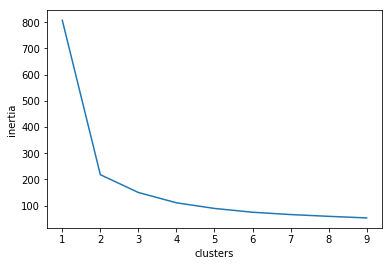

In [39]:
plt.plot(range(1,10),inertia)
plt.xlabel('clusters')
plt.ylabel('inertia')
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [63]:
X=dataframe_bl
y=species[:248]
print(len(X),len(y))

248 248


In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [67]:
logreg=LogisticRegression()

In [68]:
logreg.fit(X_train,y_train)

c:\users\r12\pycharmprojects\index\venv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
logreg.score(X_test,y_test)

0.9333333333333333

In [78]:
samples=np.random.rand(4,2)*10 #create random samples
print(samples)

[[2.1500557  3.88535868]
 [2.01990343 3.94223863]
 [9.08657835 0.31025655]
 [8.65512699 4.54057266]]


In [81]:
y_pred=logreg.predict(samples)
print(y_pred)

['fortis' 'fortis' 'scandens' 'scandens']


# Analysing Principal Components

In [82]:
from sklearn.decomposition import PCA

In [83]:
data=dataframe_bl.values

In [84]:
model=PCA()

In [85]:
model.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [86]:
features=range(model.n_components_)

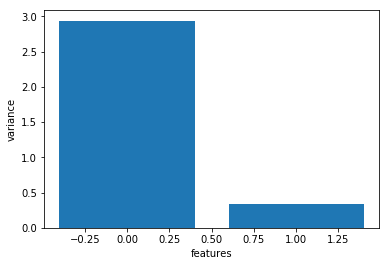

In [87]:
plt.bar(features,model.explained_variance_)
plt.xlabel('features')
plt.ylabel('variance')
plt.show()

In [88]:
pca=PCA(n_components=1)

In [89]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [94]:
transformed=pca.transform(data)
print(transformed[:5],len(transformed))

[[-2.03196203]
 [ 0.47140137]
 [-3.00266961]
 [-1.41197098]
 [-0.86656988]] 248


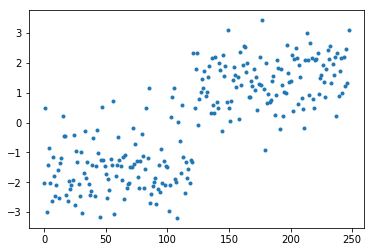

In [96]:
plt.plot(range(248),transformed,linestyle='none',marker='.')
plt.show()